# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

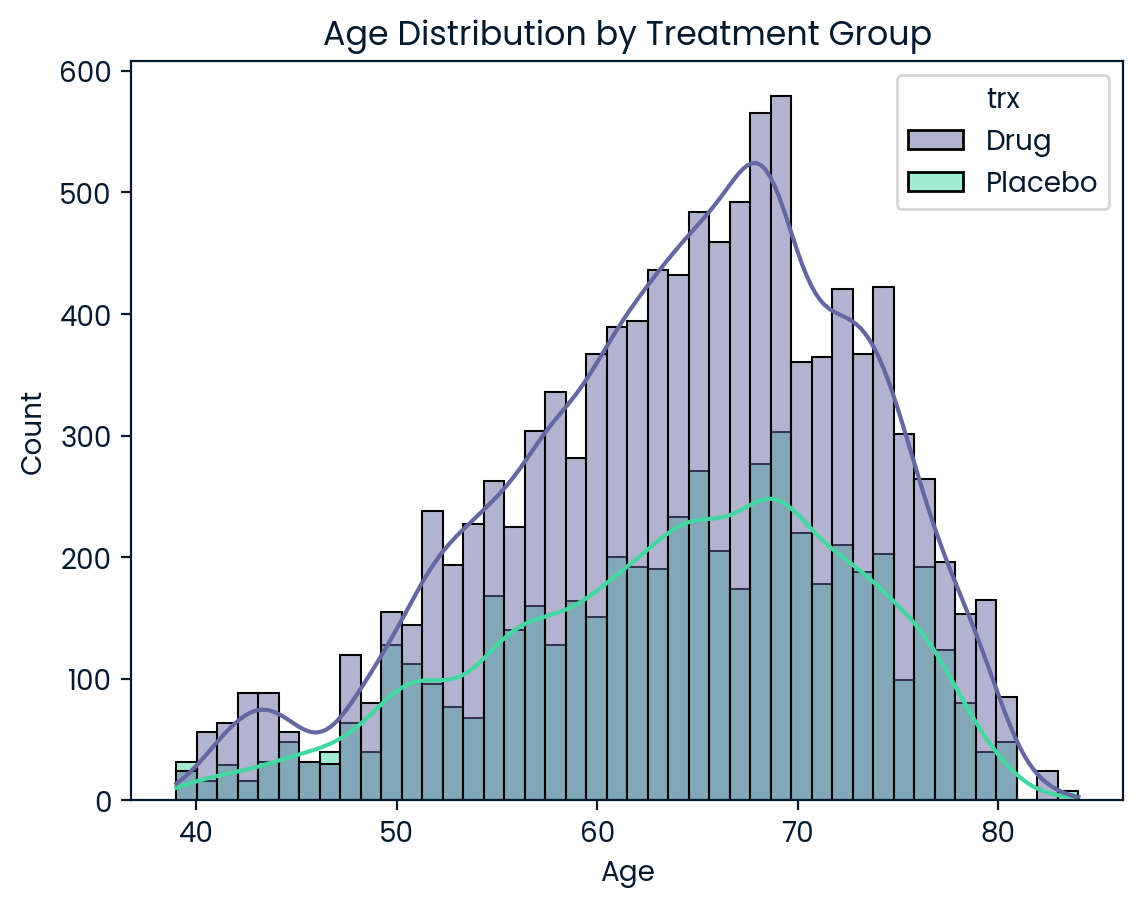

Proportion Z-Test p-value: 0.9639333330262475
Chi-Square Test p-value: 0.6150123339426765


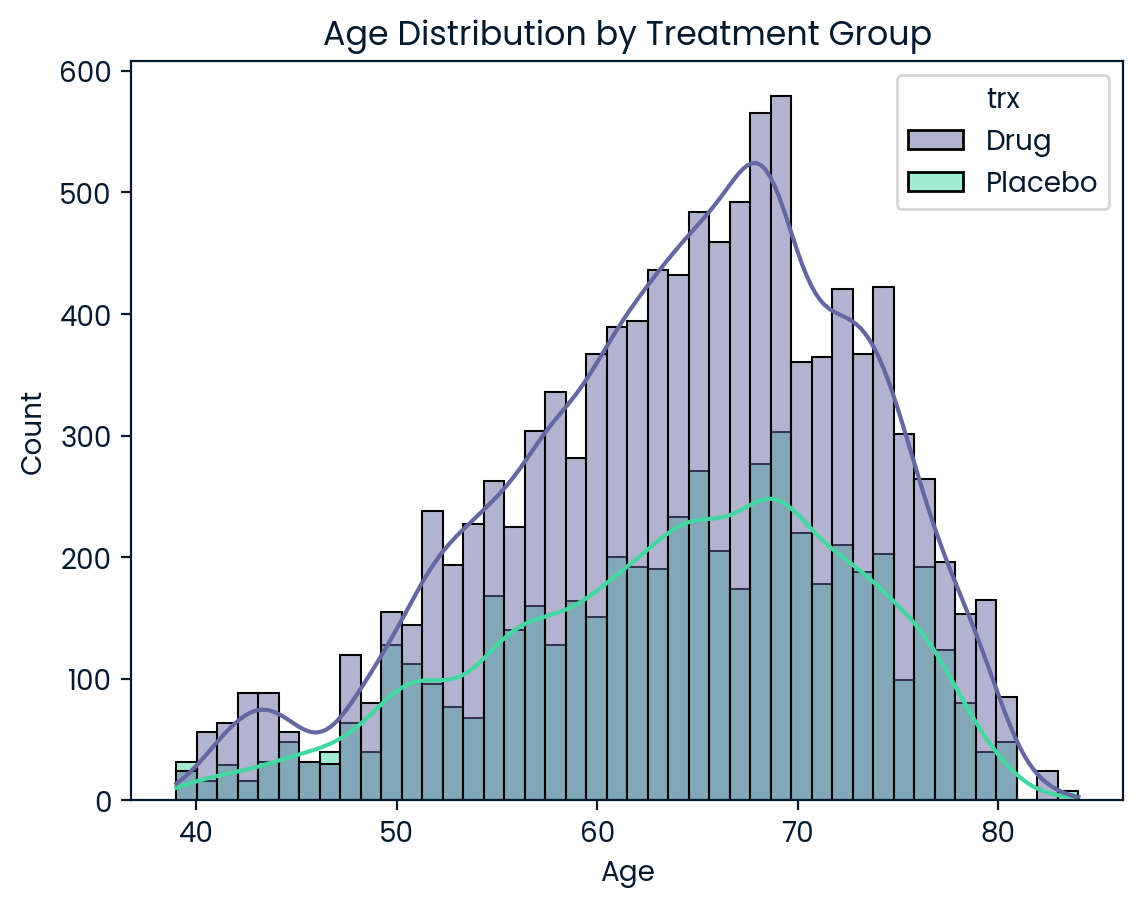

Normality Test Results:
                W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False
Mann-Whitney U Test p-value for age: 0.25696267004066287


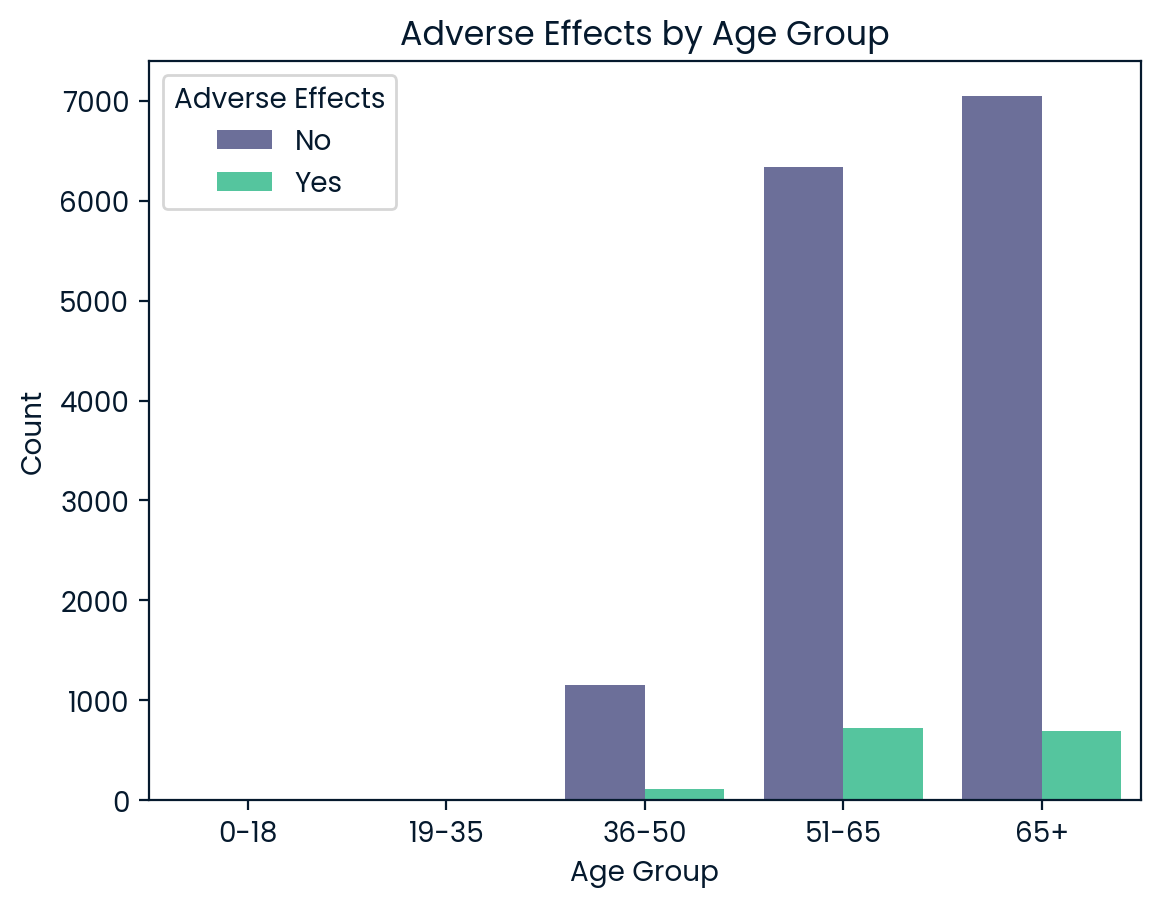

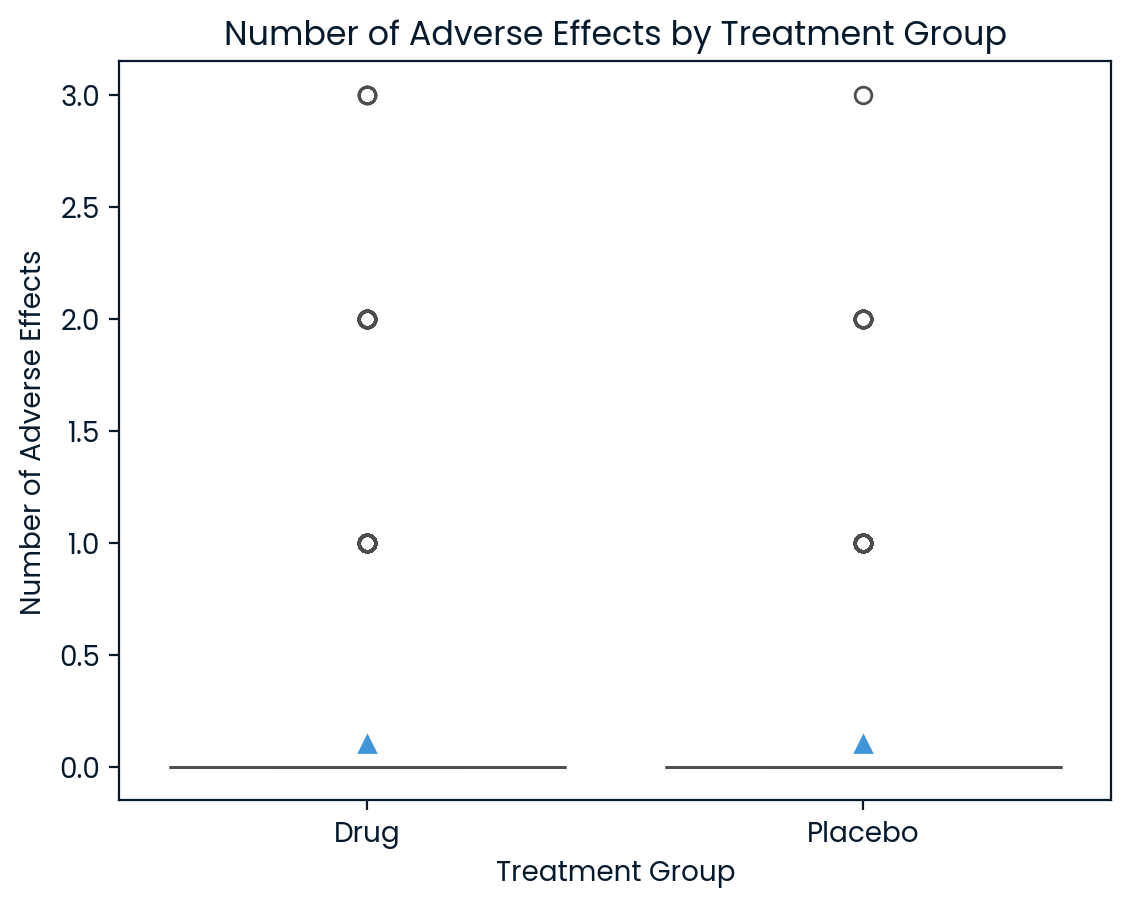

In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")
                          
# Create the directory structure if it does not exist
output_dir = "results/visualizations/"
os.makedirs(output_dir, exist_ok=True)

# Save the histogram plot
sns.histplot(data=drug_safety, x="age", hue="trx", kde=True)
plt.title("Age Distribution by Treatment Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig(f"{output_dir}age_distribution.png")  # Save visualization
plt.show()

# ------------------------------------------
# Proportion of Adverse Effects (Z-Test)
# ------------------------------------------
# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create arrays for the "Yes" counts and total counts
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)
two_sample_p_value = two_sample_results[1]
print(f"Proportion Z-Test p-value: {two_sample_p_value}")

# ------------------------------------------
# Independence of Number of Adverse Effects (Chi-Square Test)
# ------------------------------------------
# Perform Chi-Square test for num_effects and trx
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x="num_effects", y="trx")
num_effects_p_value = num_effects_groups[2]["pval"][0]
print(f"Chi-Square Test p-value: {num_effects_p_value}")

# ------------------------------------------
# Age Distribution and Comparison
# ------------------------------------------
# Create a histogram with Seaborn for age distribution
sns.histplot(data=drug_safety, x="age", hue="trx", kde=True)
plt.title("Age Distribution by Treatment Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("results/visualizations/age_distribution.png")  # Save visualization
plt.show()

# Test normality of age distribution
normality = pingouin.normality(data=drug_safety, dv="age", group="trx")
print("Normality Test Results:")
print(normality)

# Select ages by trx group
age_drug = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since age is not normally distributed, perform Mann-Whitney U test
age_group_effects = pingouin.mwu(age_drug, age_placebo)
age_group_effects_p_value = age_group_effects["p-val"].iloc[0]
print(f"Mann-Whitney U Test p-value for age: {age_group_effects_p_value}")

# ------------------------------------------
# Additional Analysis
# ------------------------------------------
# Adverse effects by age group
drug_safety['age_group'] = pd.cut(drug_safety['age'], bins=[0, 18, 35, 50, 65, 80], 
                                  labels=["0-18", "19-35", "36-50", "51-65", "65+"])

sns.countplot(data=drug_safety, x="age_group", hue="adverse_effects")
plt.title("Adverse Effects by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Adverse Effects", labels=["No", "Yes"])
plt.savefig("results/visualizations/adverse_effects_by_age_group.png")  # Save visualization
plt.show()

# Compare number of adverse effects across trx groups
sns.boxplot(data=drug_safety, x="trx", y="num_effects", showmeans=True)
plt.title("Number of Adverse Effects by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Number of Adverse Effects")
plt.savefig("results/visualizations/num_effects_by_group.png")  # Save visualization
plt.show()
